In [5]:
pip install geopandas shapely


In [6]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame with sample data
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Latitude': [40.7128, 34.0522, 41.8781, 29.7604, 33.4484],
    'Longitude': [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740]
}
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Save to a shapefile
gdf.to_file('cities.shp')


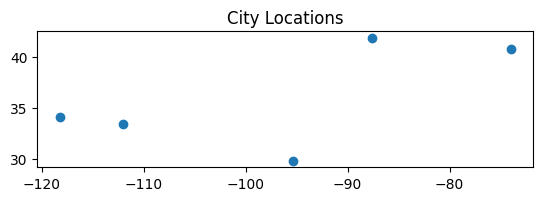

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load vector data
gdf = gpd.read_file('cities.shp')

# Plot vector data
gdf.plot()
plt.title('City Locations')
plt.show()


Roster Data

In [8]:
pip install rasterio numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 34.4 MB/s eta 0:00:00


In [9]:
import rasterio
import numpy as np
from rasterio.transform import from_origin

# Create a 10x10 raster dataset with values representing elevation
data = np.arange(100).reshape(10, 10)

# Define the transform (origin and pixel size)
transform = from_origin(0, 10, 1, 1)

# Save to a GeoTIFF file
with rasterio.open(
    'elevation.tif',
    'w',
    driver='GTiff',
    height=data.shape[0],
    width=data.shape[1],
    count=1,
    dtype=data.dtype,
    crs='+proj=latlong',
    transform=transform,
) as dst:
    dst.write(data, 1)


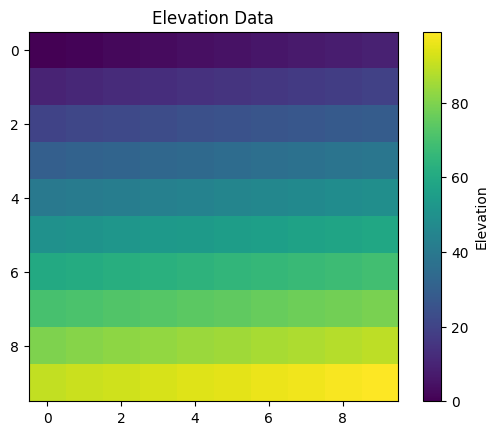

In [10]:
import rasterio
import matplotlib.pyplot as plt

# Load raster data
with rasterio.open('elevation.tif') as src:
    raster = src.read(1)

# Plot raster data
plt.imshow(raster, cmap='viridis')
plt.colorbar(label='Elevation')
plt.title('Elevation Data')
plt.show()
